(150, 4)


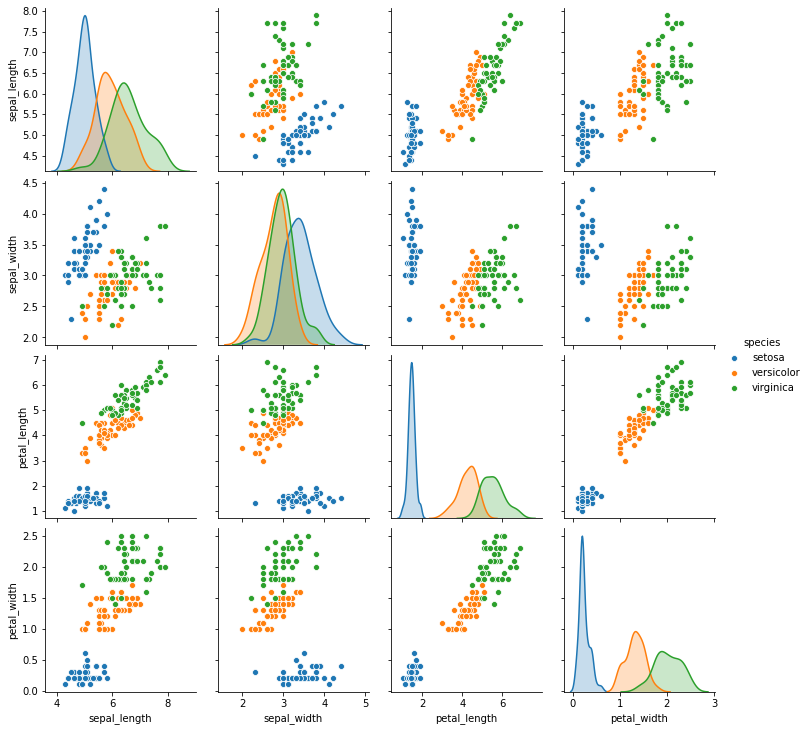

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

iris= pd.read_csv('../iris.cvs')
sns.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

Matriz de covariância K:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]



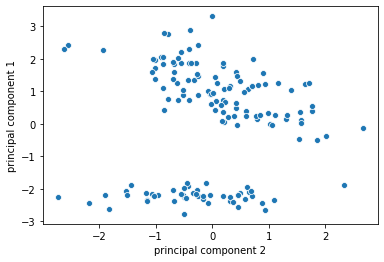

In [7]:
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'])
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf   
from sklearn import datasets
from sklearn.model_selection import train_test_split

som_dimensions = (20,20)  # dimensions of the SOM <= (rows, cols)
som_rectangular_grid_radius = 2  # size of the neighbourhood the SOM considers when doing the update
training_set_size = 2000  # number of samples we use from the training set
num_epochs = 1    # number of iterations of the algorithm we wish to run
learning_rate = 0.05  # learning rate (alpha)
mnist_size = 28 # dimensions of the images


class SOM():
    def __init__(self):
        # make a Kohonen layer and initialize all the neurons with random weights
        self.kohonen = np.random.rand(som_dimensions[0]*som_dimensions[1]*mnist_size**2)
        self.kohonen = np.reshape(self.kohonen, (som_dimensions[0], som_dimensions[1], mnist_size, mnist_size))
        print(self.kohonen.shape)
        
        
    def train(self, x_train):
        i = 1
        while i <= num_epochs:
            print('Training on epoch {}'.format(i), end='... ', flush=True)
            self._train_one_epoch(x_train)
            print('Epoch {} complete'.format(i), flush=True)
            i += 1            
        print('Training complete.', flush=True)
    
    def _train_one_epoch(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(som_dimensions[0]):
                for j in range(som_dimensions[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, mnist_size) - self.kohonen[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
        
            self._update_weights(point, vector)
        
    def _update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= som_dimensions[0]:
                return False
            elif point[1] < 0 or point[1] >= som_dimensions[1]:
                return False
            return True
        
        x_diff = -som_rectangular_grid_radius
        # change weights of all points in the neighborhood
        while x_diff <= som_rectangular_grid_radius:
            y_diff = -som_rectangular_grid_radius
            
            while y_diff <= som_rectangular_grid_radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, mnist_size) - self.kohonen[point[0]+x_diff][point[1]+y_diff]
                    self.kohonen[point[0]+x_diff][point[1]+y_diff] += learning_rate * delta
                y_diff += 1
            
            x_diff += 1

ModuleNotFoundError: No module named 'tensorflow'